# Gradient Boosting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from DatasetHandler import *

In [3]:
df = pd.read_csv("../datasets/Dataset.csv",index_col=False)
y = df['Label']
X = df.drop(columns=['Unnamed: 0', 'Label'])

In [4]:
df.head()

,Unnamed: 0,Src Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,Bwd Pkt Len Max,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Fwd PSH Flags,Bwd PSH Flags,Bwd Pkts/s,FIN Flag Cnt,SYN Flag Cnt,URG Flag Cnt,Down/Up Ratio,Active Mean,Idle Std,Label
0,0,64777,6,2028,1,1,0.0,0.000000,986.193294,2.028000e+03,0,0,493.096647,0,0,0,1.0,0.000000,0.000000,1
1,1,80,6,1763,4,3,324.0,714123.652864,3970.504821,2.938333e+02,0,0,1701.644923,0,1,0,0.0,0.000000,0.000000,1
2,2,50360,6,119961344,14,19,1460.0,60.827928,0.275089,3.748792e+06,0,0,0.158384,0,0,0,1.0,155920.666667,377288.595924,0
3,3,59992,6,1101,1,1,0.0,0.000000,1816.530427,1.101000e+03,0,0,908.265213,0,0,0,1.0,0.000000,0.000000,1
4,4,54899,17,37121,2,2,97.0,7165.755233,107.755718,1.237367e+04,0,0,53.877859,0,0,0,1.0,0.000000,0.000000,0


In [6]:
df_test = pd.read_csv("../datasets/Test.csv",index_col=False)
y_d = df_test['Label']
X_d = df_test.drop(columns=['Unnamed: 0', 'Label'])
X_d

,Src Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,Bwd Pkt Len Max,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Fwd PSH Flags,Bwd PSH Flags,Bwd Pkts/s,FIN Flag Cnt,SYN Flag Cnt,URG Flag Cnt,Down/Up Ratio,Active Mean,Idle Std
0,65301,17,1077,1,1,70.0,115134.633240,1857.010214,1.077000e+03,0,0,928.505107,0,0,0,1.0,0.0,0.000000e+00
1,64225,17,364,1,1,69.0,291208.791209,5494.505495,3.640000e+02,0,0,2747.252747,0,0,0,1.0,0.0,0.000000e+00
2,443,6,34,1,1,0.0,0.000000,58823.529412,3.400000e+01,0,0,29411.764706,0,0,1,1.0,0.0,0.000000e+00
3,51813,6,2821457,9,7,1149.0,879.332912,5.670829,1.880971e+05,0,0,2.480988,0,0,0,0.0,0.0,0.000000e+00
4,50942,6,1462,1,1,0.0,0.000000,1367.989056,1.462000e+03,0,0,683.994528,0,0,0,1.0,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,44590,6,45442,1,1,0.0,0.000000,44.012147,4.544200e+04,0,0,22.006074,0,0,0,1.0,0.0,0.000000e+00
399996,80,6,4452546,4,4,332.0,284.556297,1.796725,6.360780e+05,0,0,0.898362,0,0,0,1.0,0.0,0.000000e+00
399997,64989,17,214290,2,2,148.0,1670.633254,18.666293,7.143000e+04,0,0,9.333147,0,0,0,1.0,0.0,0.000000e+00
399998,0,0,112637067,63,0,0.0,0.000000,0.559319,1.816727e+06,0,0,0.000000,0,0,0,0.0,25960503.0,3.584165e+06


## CatBoost

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier, Pool
from catboost.utils import get_roc_curve
import shap
shap.initjs()

from sklearn.preprocessing import MinMaxScaler
msk = ~X.isin([np.nan, np.inf, -np.inf]).any(1)
X = X[msk]
y = y[msk]
sc = MinMaxScaler()
X = sc.fit_transform(X)


In [9]:
X = pd.DataFrame(X)
X

,Src Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,Bwd Pkt Len Max,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Fwd PSH Flags,Bwd PSH Flags,Bwd Pkts/s,FIN Flag Cnt,SYN Flag Cnt,URG Flag Cnt,Down/Up Ratio,Active Mean,Idle Std
0,64777,6,2028,1,1,0.0,0.000000,986.193294,2.028000e+03,0,0,493.096647,0,0,0,1.0,0.000000,0.000000
1,80,6,1763,4,3,324.0,714123.652864,3970.504821,2.938333e+02,0,0,1701.644923,0,1,0,0.0,0.000000,0.000000
2,50360,6,119961344,14,19,1460.0,60.827928,0.275089,3.748792e+06,0,0,0.158384,0,0,0,1.0,155920.666667,377288.595924
3,59992,6,1101,1,1,0.0,0.000000,1816.530427,1.101000e+03,0,0,908.265213,0,0,0,1.0,0.000000,0.000000
4,54899,17,37121,2,2,97.0,7165.755233,107.755718,1.237367e+04,0,0,53.877859,0,0,0,1.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219995,80,6,4308077,4,4,345.0,297.116324,1.856977,6.154396e+05,0,0,0.928489,0,0,0,1.0,0.000000,0.000000
219996,52184,6,85,2,0,0.0,0.000000,23529.411765,8.500000e+01,0,0,0.000000,0,0,0,0.0,0.000000,0.000000
219997,80,6,4407694,4,4,307.0,281.779997,1.815008,6.296706e+05,0,0,0.907504,0,0,0,1.0,0.000000,0.000000
219998,45894,6,400,1,1,0.0,0.000000,5000.000000,4.000000e+02,0,0,2500.000000,0,0,0,1.0,0.000000,0.000000


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
train_data = Pool(X_train,y_train)
test_data = Pool(X_test,y_test)

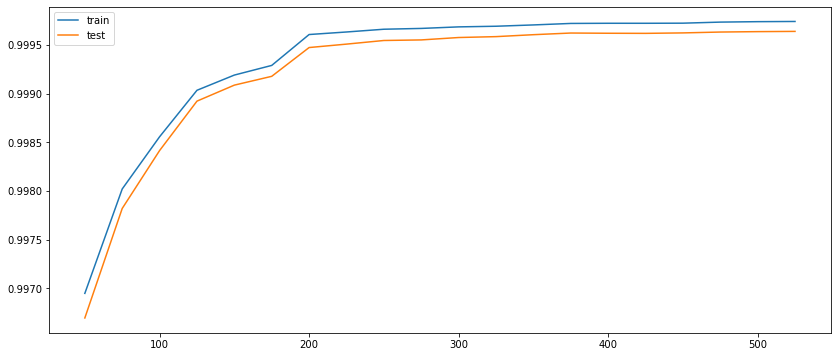

In [8]:
tr_roc_auc = []
test_roc_auc = []
it_array = np.arange(50, 550, 25)

for it in it_array:
    cb = CatBoostClassifier(iterations=it,max_depth=3,learning_rate=0.1, loss_function='Logloss',verbose=False, thread_count= -1)
    cb.fit(train_data)
    tr_roc_auc.append(roc_auc_score(y_train,cb.predict_proba(X_train)[:,1]))
    test_roc_auc.append(roc_auc_score(y_test,cb.predict_proba(X_test)[:,1]))

plot_auc_array(it_array,tr_roc_auc,test_roc_auc)

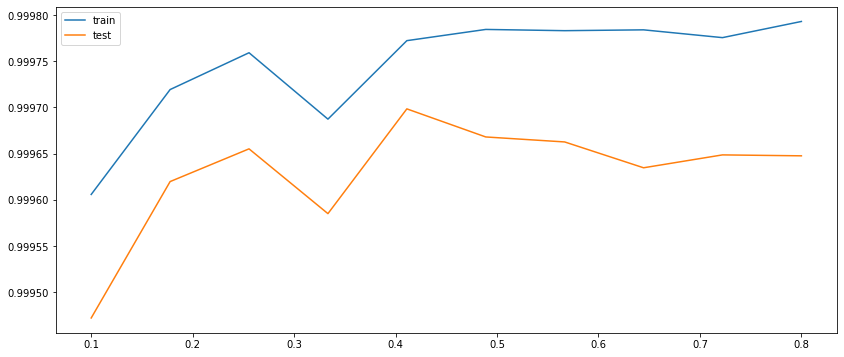

In [9]:
l_r_array = np.linspace(0.1, 0.8, 10)
tr_roc_auc.clear()
test_roc_auc.clear()

for l in l_r_array:
    cb = CatBoostClassifier(iterations=200,max_depth=3,learning_rate=l, loss_function='Logloss',verbose=False, thread_count= -1)
    cb.fit(train_data)
    tr_roc_auc.append(roc_auc_score(y_train,cb.predict_proba(X_train)[:,1]))
    test_roc_auc.append(roc_auc_score(y_test,cb.predict_proba(X_test)[:,1]))

plot_auc_array(l_r_array,tr_roc_auc,test_roc_auc)

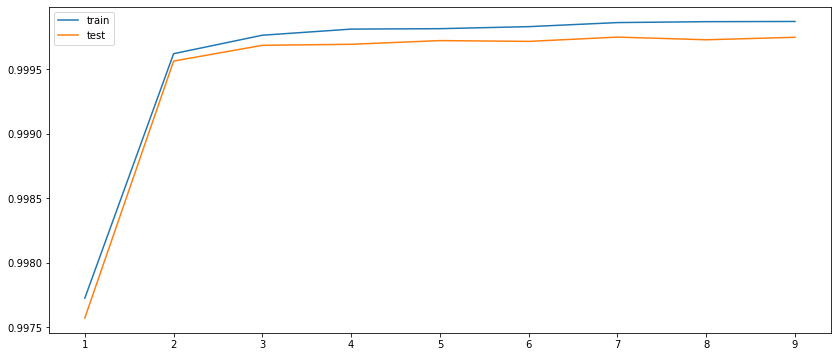

In [10]:
depth_array = np.arange(1,10,1)
tr_roc_auc.clear()
test_roc_auc.clear()

for d in depth_array:
    cb = CatBoostClassifier(iterations=200,max_depth=d,learning_rate=0.4, loss_function='Logloss',verbose=False, thread_count= -1)
    cb.fit(train_data)
    tr_roc_auc.append(roc_auc_score(y_train,cb.predict_proba(X_train)[:,1]))
    test_roc_auc.append(roc_auc_score(y_test,cb.predict_proba(X_test)[:,1]))

plot_auc_array(depth_array,tr_roc_auc,test_roc_auc)

In [11]:
cat_one_model = CatBoostClassifier(iterations=200,
                           depth=2,
                           learning_rate=0.4,
                           loss_function='Logloss',
                           verbose=False)
cat_one_model.fit(train_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Метрики для малой тестовой выборки

In [17]:
cat_one_model.save_model('CBmodel.cbm',format="cbm")

In [12]:
roc_auc_score(y_test, cat_one_model.predict_proba(X_test)[:,1])

0.9995635124706479

In [13]:
accuracy_score(y_test, cat_one_model.predict(X_test))

0.9943636363636363

Метрики для большой тестовой выборки

In [14]:
roc_auc_score(y_d, cat_one_model.predict_proba(X_d)[:,1])

0.99962011655

In [15]:
accuracy_score(y_d, cat_one_model.predict(X_d))

0.9947125

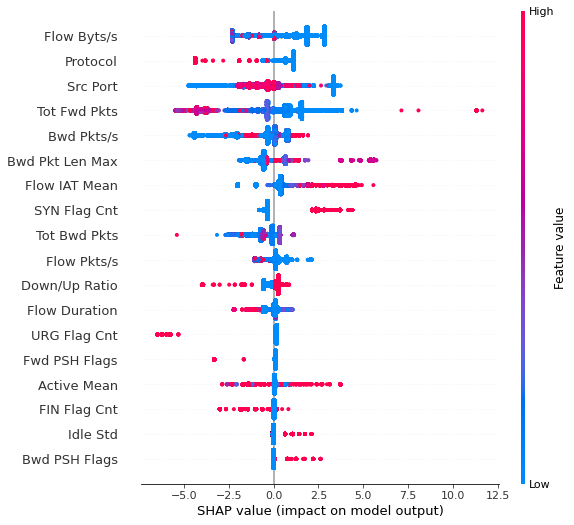

In [16]:
explainer = shap.TreeExplainer(cat_one_model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

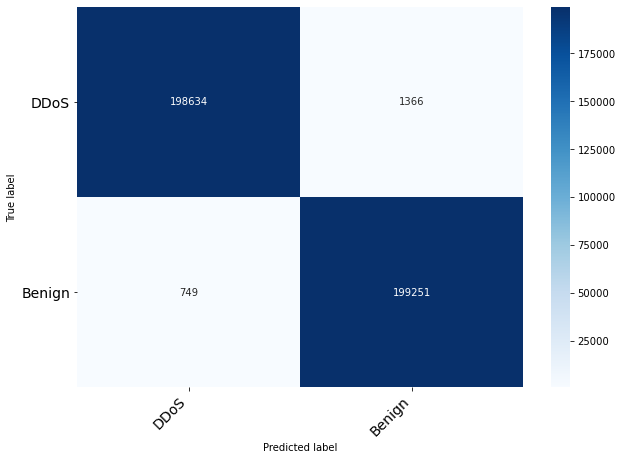

In [17]:
from catboost.utils import get_confusion_matrix
cf_cat = get_confusion_matrix(cat_one_model,Pool(X_d,y_d))
fig1=print_confusion_matrix(cf_cat.astype(int),["DDoS","Benign"])

## LGBM

In [19]:
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
train = lgb.Dataset(X_train,label=y_train,free_raw_data=False)
test = lgb.Dataset(X_test, label=y_test,reference=train,free_raw_data=False)

In [22]:
def set_parametrs():
    param_ = {}
    param_['boosting_type']='gbdt'
    param_['objective']='binary'
    param_['metric']='binary_logloss'
    param_['learning_rate']=0.1
    param_['num_threads'] = -1
    param_['max_depth'] = 3
    param_['verbose'] = -1
    param_['num_leaves'] = 32
    return param_

In [23]:
parametrs = set_parametrs()

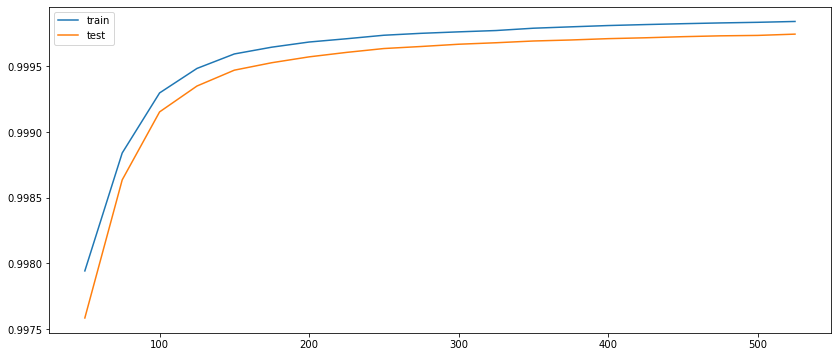

In [23]:
n_est = np.arange(50, 550, 25)
tr_roc_auc.clear()
test_roc_auc.clear()

for n in n_est:
    clf=lgb.train(parametrs,train,n,valid_sets=test,verbose_eval=False)
    tr_roc_auc.append(roc_auc_score(y_train,clf.predict(X_train)))
    test_roc_auc.append(roc_auc_score(y_test, clf.predict(X_test)))
    
plot_auc_array(n_est,tr_roc_auc,test_roc_auc)

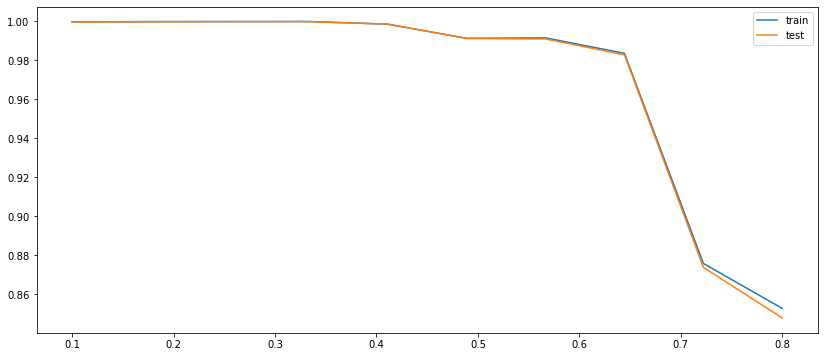

In [24]:
tr_roc_auc.clear()
test_roc_auc.clear()
l_r = np.linspace(0.1, 0.8, 10)
for l in l_r: 
    parametrs['learning_rate']=l
    clf=lgb.train(parametrs,train,200,valid_sets=test,verbose_eval=False)
    tr_roc_auc.append(roc_auc_score(y_train,clf.predict(X_train)))
    test_roc_auc.append(roc_auc_score(y_test, clf.predict(X_test)))
    
plot_auc_array(l_r,tr_roc_auc,test_roc_auc)

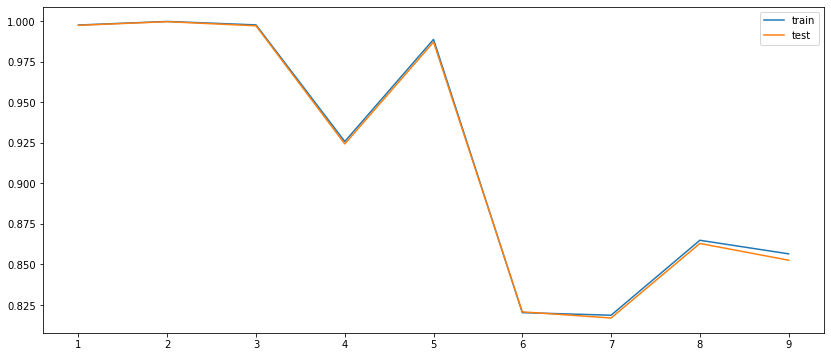

In [25]:
test_roc_auc.clear()
tr_roc_auc.clear()
depth = np.arange(1, 10, 1)

parametrs['learning_rate']=0.4
for d in depth: 
    parametrs['max_depth'] = d
    parametrs['num_leaves'] = 2**d
    clf=lgb.train(parametrs,train,200,valid_sets=test,verbose_eval=False)
    tr_roc_auc.append(roc_auc_score(y_train,clf.predict(X_train)))
    test_roc_auc.append(roc_auc_score(y_test, clf.predict(X_test)))
plot_auc_array(depth,tr_roc_auc,test_roc_auc)

In [25]:
parametrs['max_depth'] = 2
parametrs['learning_rate']=0.4
parametrs['num_leaves'] = 2**2
lgbm_all_model=lgb.train(parametrs,train,200,valid_sets=test,verbose_eval=False)

In [28]:
lgbm_all_model.save_model('Saving/lgbm_model.mdl')

In [31]:
clf = lgb.Booster(model_file='Saving/lgbm_model.mdl')

Метрики для малой тестовой выборки

In [26]:
roc_auc_score(y_test, lgbm_all_model.predict(X_test))

0.9996358633150272

In [28]:
accuracy_score(y_test, lgbm_all_model.predict(X_test).round(0))

0.9957272727272727

Метрики для большой тестовой выборки

In [29]:
roc_auc_score(y_d, lgbm_all_model.predict(X_d))

0.9997355918

In [30]:
accuracy_score(y_d, lgbm_all_model.predict(X_d).round(0))

0.996235

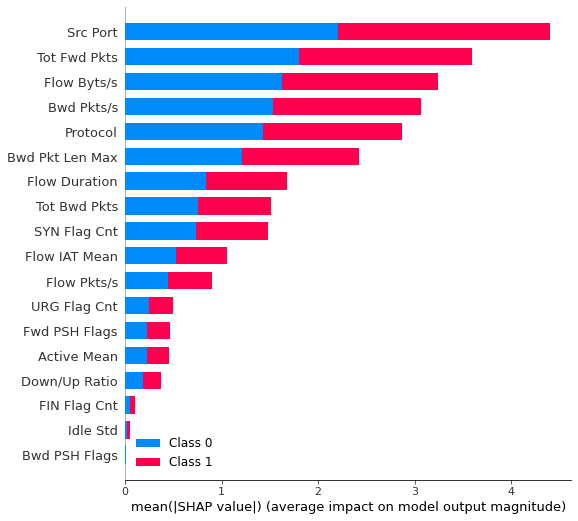

In [31]:
explainer = shap.TreeExplainer(lgbm_all_model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

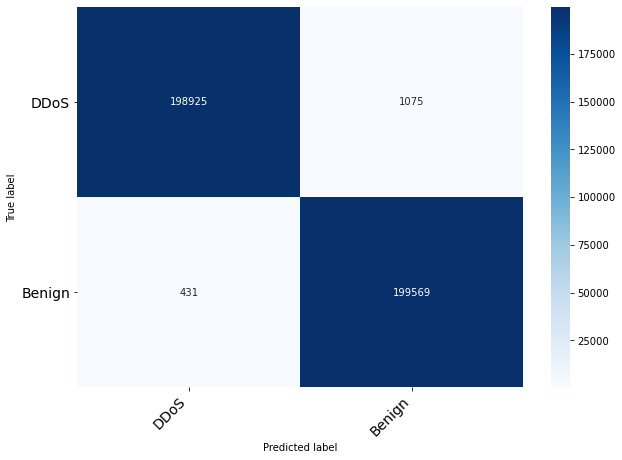

In [32]:
from sklearn.metrics import confusion_matrix
cf_lgb = confusion_matrix(y_d, lgbm_all_model.predict(X_d).round(0))
fig2 = print_confusion_matrix(cf_lgb,["DDoS","Benign"])